<b><h1>Bellman-Ford</h1></b>
<p align="justify">Δίνεται το παρακάτω σχήμα</p>
<img src="https://raw.githubusercontent.com/nkostopoulos/StochasticsLabPublic/master/lab8/bellman-topology.png"></img>

<b><h3>Ερωτήσεις</h3></b>
<ul>
<li>Να περιγράψετε, συνοπτικά, τη λειτουργία του αλγορίθμου <i>Bellman-Ford</i>.</li>
<li>Να εφαρμόσετε τον αλγόριθμο <i>Bellman-Ford</i> στο γράφο του παραπάνω σχήματος για τις ακμές που συμβολίζονται με μαύρο χρώμα και συνεχή γραμμή. Ως πηγή του αλγορίθμου να θεωρήσετε το <b>AS #2</b>. Ποιο είναι το συνολικό κόστος της διαδρομής από το <b>AS #2</b> στο <b>AS #11</b>; Ποιο είναι το μονοπάτι του δέντρου <i>Bellman-Ford</i> από το <b>AS #2</b> στο <b>AS #11</b>;</li>
<li>Το <b>AS #2</b> εξετάζει την προσθήκη μιας ζεύξης είτε με το <b>AS #4</b> ή με το <b>AS #1</b>. Οι ζεύξεις αυτές φαίνονται στον παραπάνω γράφο με μαύρες διακεκομμένες γραμμές. Γιατί πιστεύετε ότι χρειάζεται το <b>AS #2</b> την επιπλέον αυτή ζεύξη; Ποια από τις παραπάνω ζεύξεις θα πρέπει να προτιμήσει το <b>AS #2</b> για να είναι μικρότερο το κόστος της διαδρομής από το <b>AS #2</b> μέχρι το <b>AS #11;</b></li>
<li>Προσθέστε την κατάλληλη ζεύξη, όπως την προσδιορίσατε στο προηγούμενο ερώτημα. Έστω ότι η ζεύξη <b>AS #2</b> – <b>AS #3</b> παθαίνει μια βλάβη. Ποιο είναι, τώρα, το κόστος της διαδρομής από το <b>AS #2</b> μέχρι το <b>AS #11</b>; Πόσο επιβαρύνθηκε σε σχέση με το δεύτερο ερώτημα;</li>
<li>Έστω ότι αποκαθίσταται η βλάβη. Το <b>AS #12</b> προσφέρεται να ενώσει τα <b>AS #10</b> και <b>AS #11</b> απ’ ευθείας στο <b>AS #3</b>. Το <b>AS #12</b> μαζί με τις νέες ακμές που θα προστεθούν φαίνονται με κόκκινο χρώμα στον παραπάνω γράφο. Πόσο θα βελτιωθεί το συνολικό κόστος <b>AS #2</b> – <b>AS #11</b>; Το συγκεκριμένο ερώτημα προσπαθεί να προσομοιώσει τη λειτουργία του GR-IX. Τι είναι το GR-IX (<a href="https://gr-ix.gr">site</a>) και ποιος είναι ο ρόλος του για το ελληνικό Internet;</li>
</ul>
<br>
<i><p align="justify">Για την επιλύση της άσκησης θα χρησιμοποιήσετε τη βιβλιοθήκη της Python <a href="https://pypi.org/project/bellmanford/">bellmanford</a></p></i>

## Qusetion 1
Να περιγράψετε, συνοπτικά, τη λειτουργία του αλγορίθμου <i>Bellman-Ford</i>

Ο αλγόριθμος Bellman-Ford είναι ένας αλγόριθμος συντομότατων διαδρομών σε έναν γράφο, που βασίζεται στην ιδιότητα πως μια συντομότατη διαδρομή ανάμεσα σε δύο κόμβους εμπεριέχει άλλες συντομότατες διαδρομές. Στηρίζεται στην έννοια της χαλάρωσης ως πράξη που υφίστανται οι ακμές του γράφου για τον υπολογισμό των συντομότατων διαδρομών.

Αρχικά, ορίζουμε έναν κατευθυντικό γράφο $G=(V,E)$ με αφετηριακό κόμβο $s$, όπου $V$: σύνολο των κόμβων και $E$: σύνολο των ακμών του γράφου, και συνάρτηση βάρους $w: E \rightarrow \mathbb{R}$ που αντιστοιχίζει ένα βάρος (πραγματικός αριθμός) σε κάθε ακμή.
Έστω ότι μια διαδρομή είναι $p = {v_0, v_1, ..., v_k}$ και το βάρος της λοιπόν είναι: $w(p) = \sum_{i=1}^{k}w(v_{i-1},v_i) = w(v_0,v_1) + w(v_1,v_2) + ... + w(v_{k-1},v_k)$.
Τότε το **βάρος συντομότατης διαδρομής** από τον κόμβο $u$ στον $v$ είναι:

$$
\delta(u, v)=\left\{\begin{array}{l}
\min \{w(p): u \rightarrow v\}, \ αν \ υπάρχει \ διαδρομή \ από \ το \ u \ στο \ v \\
\infty, \ διαφορετικά
\end{array}\right.
$$

Εάν σε κάποια διαδρομή από τον αφετηριακό κόμβο $s$ ως τυχόντα κόμβο $v$ υπάρχει κύκλος αρνητικού βάρους (λόγω των αρνητικών βαρών των ακμών), τότε ορίζουμε $δ(s,v)=-\infty$, ήτοι καμία διαδρομή από $s$ σε $v$ δεν μπορεί να είναι συντομότατη, καθώς μπορούμε πάντα να βρούμε μια διαδρομή μικρότερου βάρους διατρέχοντας τον κύκλο αρνητικού βάρους.

Ο αλγόριθμος Bellman-Ford, σε αντίθεση με τον Djikstra που δεν επιτρέπει αρνητικά βάρη ακμών, εντοπίζει επίσης κύκλους αρνητικού βάρους και αναφέρει την ύπαρξη τους.

Οι **διαδρομές** που δεν περιέχουν κύκλους λέγονται **απλές**. Οι συντομότατες διαδρομές είναι απλές, ισοδύναμα δεν περιέχουν κύκλους. Εφόσον ένας γράφος $G(V,E)$ περιέχει $|V|$ το πολύ διαφορετικούς κόμβους, και άρα $|V|-1$ ακμές τότε περιορίζουμε τη μελέτη μας σε συντομότατες (απλές) διαδρομές με το πολύ $|V|-1$ ακμές.

Έπειτα εφαρμόζουμε τον αλγόριθμο υλοποιώντας την έννοια της χαλάρωσης, αφού ορίσουμε τα εξής για έναν κόμβο $v$:
- $v.π$: προκάτοχος κόμβος του $v$ ώστε η αλληλουχία προκατόχων από το $v$ στο $s$ να ορίζει συντομότατη διαδρομή από το $s$ στο $v$
- $v.d$: η εκτίμηση συντομότατης διαδρομής για τον κόμβο.

Αλγόριθμος - ψευδοκώδικας Bellman-Ford $(G,w,s)$:
1. Αρχικοποίηση
    - Για κάθε κόμβο $v \in G.V$
        - $v.d = \infty$
        - $v.π = ΚΕΝΟ$
    - $s.d = 0$
2. Ορισμός συνάρτησης χαλάρωσης $relax(u,v,w)$ (εν γένει μειώνει $v.d$):
    - Αν $v.d > u.d + w(u,v)$:
        - $v.d = u.d + w(u,v)$
        - $v.π = u$
3. Eπανάληψη:
- Για $i=1$ έως $|G.V|-1$:
    - Για κάθε ακμή $(u,v) \in G.E$:
        - κλήση συνάρτησης χαλάρωσης, $relax(u,v,w)$
- Για κάθε ακμή $(u,v) \in G.E$:
    - Αν $v.d > u.d + w(u,v)$:
        - επιστροφή ΨΕΥΔΕΣ
- επιστροφή ΑΛΗΘΕΣ

Κάθε ακμή υφίσταται $|V|-1$ πράξεις χαλάρωσης.

Στην ακόλουθη εικόνα, παροουσιάζεται ένα παράδειγμα γράφου όπου εφαρμόζεται ο αλγόριθμος Bellman-Ford.

![image](./Bellman-ford-example-graph-application.jpg)

## Question 2
Να εφαρμόσετε τον αλγόριθμο <i>Bellman-Ford</i> στο γράφο του παραπάνω σχήματος για τις ακμές που συμβολίζονται με μαύρο χρώμα και συνεχή γραμμή. Ως πηγή του αλγορίθμου να θεωρήσετε το <b>AS #2</b>. Ποιο είναι το συνολικό κόστος της διαδρομής από το <b>AS #2</b> στο <b>AS #11</b>; Ποιο είναι το μονοπάτι του δέντρου <i>Bellman-Ford</i> από το <b>AS #2</b> στο <b>AS #11</b>

Θεωρούμε ώς κόμβο έναρξης $s = AS #2$

In [4]:
#install bellman ford and networkx (graphs) libraries
!pip install bellmanford networkx

You should consider upgrading via the 'C:\Users\User\Downloads\DSML MsC\2nd semester\Στοχαστικές Διεργασίες και Βελτιστοποίηση\StochasticsLabPublic\venv\Scripts\python.exe -m pip install --upgrade pip' command.


In [157]:
# import libraries
import bellmanford as bf
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

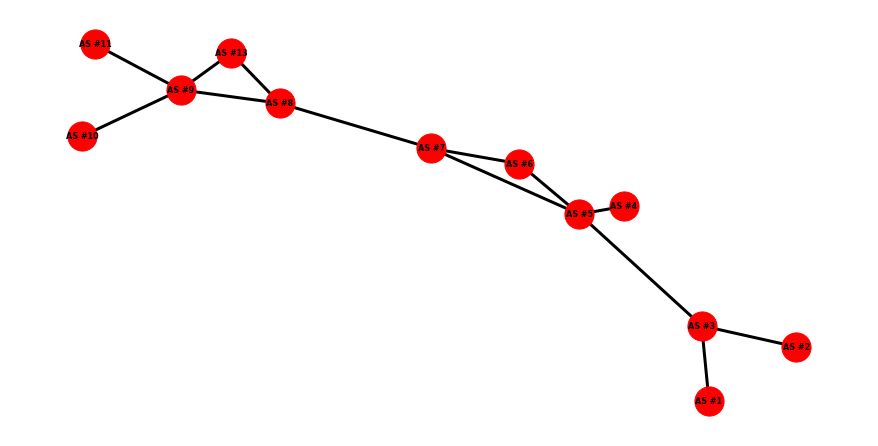

In [158]:
# set the seed
np.random.seed(40)

# define a graph
G = nx.Graph()

# generate the nodes strings
base_string = 'AS #'
ns = [f'{base_string}{i}' for i in range(1, 14)]  # node strings AS #1, AS #2, ... AS# 10, AS #11, AS #12, AS #13

# add nodes to the graph
edges_excluding_AS12 = ns[:11]+[ns[12]]
G.add_nodes_from(edges_excluding_AS12) # create a graph that doesn't include edge 12

# add edges to the graph
G.add_edges_from([(ns[5-1], ns[3-1]), (ns[5-1], ns[7-1])], color='red', weight=2) # add all edges with weight=2, Connecting nodes (5,3) and (5,7)
G.add_edges_from([(ns[7-1], ns[8-1]), (ns[9-1], ns[10-1])], color='red', weight=3) # weight=3, edges: (7,8) and (9,10)
G.add_edges_from([(ns[1-1], ns[3-1]), (ns[2-1], ns[3-1]), (ns[6-1], ns[7-1]), (ns[8-1], ns[13-1]), (ns[9-1], ns[11-1])], color='red', weight=4) # weight=4
G.add_edges_from([(ns[5-1], ns[6-1]), (ns[9-1], ns[13-1])], color='red', weight=5) # weight=5
G.add_edge(ns[8-1], ns[9-1], color='red', weight=7) # weight=7
G.add_edge(ns[4-1], ns[5-1], color='red', weight=20) # weight=20

# visualization of graph
options = {
    'node_size': 850,
    'node_color': 'red',
    'width': 3,
    'font_size': 8,
}

fig = plt.figure(figsize=(12,6))
nx.draw(G, with_labels=True, font_weight='bold', **options)
plt.show()

In [159]:
bf_shortest_path = bf.bellman_ford(G, source='AS #2',target="AS #11")
bf_shortest_path

(22, ['AS #2', 'AS #3', 'AS #5', 'AS #7', 'AS #8', 'AS #9', 'AS #11'], False)

In [160]:
print(f'The cost of the shortest path from AS #2 to AS #11 is: {bf_shortest_path[0]}')
print(f'The path sequence of the shortest path from AS #2 to AS #11 is: {bf_shortest_path[1]}')


The cost of the shortest path from AS #2 to AS #11 is: 22
The path sequence of the shortest path from AS #2 to AS #11 is: ['AS #2', 'AS #3', 'AS #5', 'AS #7', 'AS #8', 'AS #9', 'AS #11']


We can see that the cost of the shortest path from AS #2 to AS #11 is 22 and the shortest path is:
AS #2 -> AS #3 -> AS #5 -> AS #7 -> AS #8 -> AS #9 -> AS #11

## Question 3
Το <b>AS #2</b> εξετάζει την προσθήκη μιας ζεύξης είτε με το <b>AS #4</b> ή με το <b>AS #1</b>. Οι ζεύξεις αυτές φαίνονται στον παραπάνω γράφο με μαύρες διακεκομμένες γραμμές. Γιατί πιστεύετε ότι χρειάζεται το <b>AS #2</b> την επιπλέον αυτή ζεύξη; Ποια από τις παραπάνω ζεύξεις θα πρέπει να προτιμήσει το <b>AS #2</b> για να είναι μικρότερο το κόστος της διαδρομής από το <b>AS #2</b> μέχρι το <b>AS #11;

Η επιπλέον ζεύξη από το **AS #2** είτε με τον κόμβο **AS #4** είτε με τον **AS #1** χρειάζεται στο γράφο, καθώς μπορεί η ακμή από το **AS #2** στο **AS #3** που συνδέει τον κόμβο **AS #2** με τον υπόλοιπο γράφο να υποστεί κάποια βλάβη και να αποκοπεί από το δίκτυο και να χαθεί η πρόσβαση στον κόμβο αυτό.

Η ζεύξη **AS #2** με **AS #1** θα προτιμηθεί από την  **AS #2** με **AS #4**, καθώς το κόστος πρόσβασης στον κόμβο **AS #2** είναι μικρότερο σε περίπτωση βλάβης της ακμής  **AS #2** με **AS #3**.

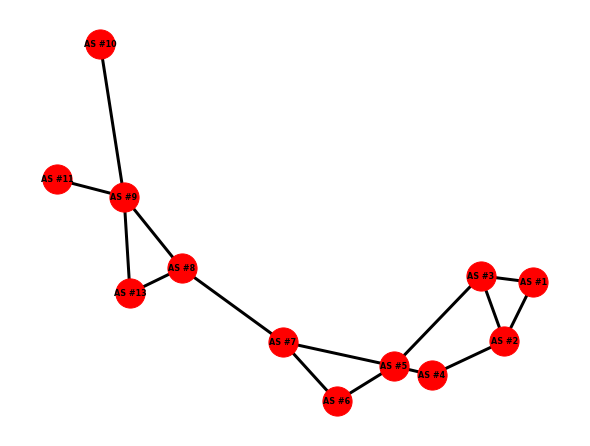

In [161]:
# we add the two edges

G.add_edge(ns[2-1], ns[4-1], color='red', weight=4) # AS#2 to AS#4
G.add_edge(ns[2-1], ns[1-1], color='red', weight=10) # AS#2 to AS#1

fig = plt.figure(figsize=(8,6))
nx.draw(G, with_labels=True, font_weight='bold', **options)
plt.show()

In [162]:
bf_shortest_path = bf.bellman_ford(G, source='AS #2',target="AS #11")
bf_shortest_path

(22, ['AS #2', 'AS #3', 'AS #5', 'AS #7', 'AS #8', 'AS #9', 'AS #11'], False)

Όπως αναμέναμε δεν άλλαξε ούτε το cost του shortest path ούτε το ίδιο το shortest path (κόμβοι του shortest path)

## Question 4
Προσθέστε την κατάλληλη ζεύξη, όπως την προσδιορίσατε στο προηγούμενο ερώτημα. Έστω ότι η ζεύξη <b>AS #2</b> – <b>AS #3</b> παθαίνει μια βλάβη. Ποιο είναι, τώρα, το κόστος της διαδρομής από το <b>AS #2</b> μέχρι το <b>AS #11</b>; Πόσο επιβαρύνθηκε σε σχέση με το δεύτερο ερώτημα;

Αφαιρούμε με βάση την Ερώτηση 3, την ακμή  **AS #2** σε **AS #4** αλλά και την ακμή  **AS #2** σε **AS #3** λόγω βλάβης. Υπολογίζουμε έπειτα το shortest path και το κόστος του.

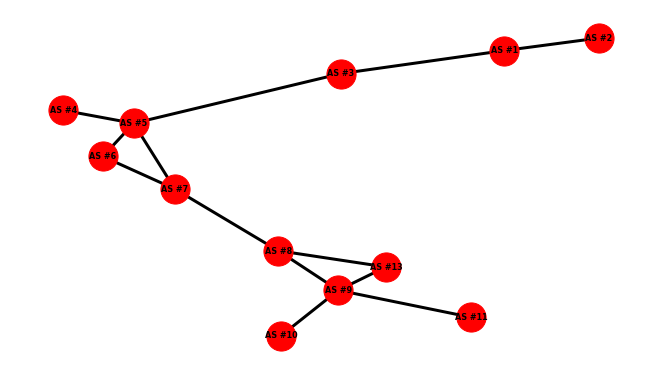

In [164]:
# we remove the two edges
G.remove_edge(ns[2-1], ns[4-1])
G.remove_edge(ns[2-1], ns[3-1])

fig = plt.figure(figsize=(9, 5))
nx.draw(G, with_labels=True, font_weight='bold', **options)
plt.show()

In [165]:
bf_shortest_path = bf.bellman_ford(G, source='AS #2',target="AS #11")
bf_shortest_path

(32,
 ['AS #2', 'AS #1', 'AS #3', 'AS #5', 'AS #7', 'AS #8', 'AS #9', 'AS #11'],
 False)

Βλέπουμε ότι στην περίπτωση αυτή, το κόστος αυξήθηκε κατά 10, ενώ άλλαξε και το shortest path των nodes καθώς προστέθηκε ο node **AS #1** μετά το starting node. Η διαφορά στο κόστος είναι το βάρος της ζεύξης **AS #2** σε **AS #1**.

Για λόγους πληρότητας, εξετάζουμε και την περίπτωση όπου έχει υποστεί βλάβη η ζεύξη **AS #2** σε **AS #3**, ενώ αφαιρούμε και τη ζεύξη **AS #2** σε **AS #1** και προσθέτουμε τη ζεύξη **AS #2** σε **AS #4**, ώστε να δείξουμε και πρακτικά ότι το κόστος αυξάνεται.

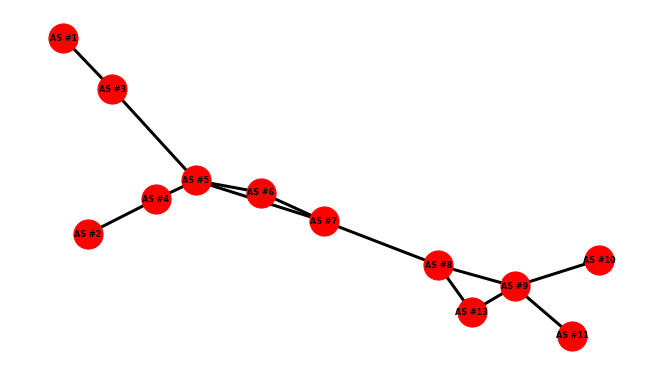

In [166]:
# we remove the two edges
G.remove_edge(ns[2-1], ns[1-1])
G.add_edge(ns[2-1], ns[4-1], color='red', weight=4)

fig = plt.figure(figsize=(9, 5))
nx.draw(G, with_labels=True, font_weight='bold', **options)
plt.show()

In [167]:
bf_shortest_path = bf.bellman_ford(G, source='AS #2',target="AS #11")
bf_shortest_path

(40, ['AS #2', 'AS #4', 'AS #5', 'AS #7', 'AS #8', 'AS #9', 'AS #11'], False)

Βλέπουμε ότι πράγματι, το κόστος αυξήθηκε σε σχέση με πριν.

## Question 5
Έστω ότι αποκαθίσταται η βλάβη. Το <b>AS #12</b> προσφέρεται να ενώσει τα <b>AS #10</b> και <b>AS #11</b> απ’ ευθείας στο <b>AS #3</b>. Το <b>AS #12</b> μαζί με τις νέες ακμές που θα προστεθούν φαίνονται με κόκκινο χρώμα στον παραπάνω γράφο. Πόσο θα βελτιωθεί το συνολικό κόστος <b>AS #2</b> – <b>AS #11</b>; Το συγκεκριμένο ερώτημα προσπαθεί να προσομοιώσει τη λειτουργία του GR-IX. Τι είναι το GR-IX (<a href="https://gr-ix.gr">site</a>) και ποιος είναι ο ρόλος του για το ελληνικό Internet;

Αρχικά, ξανακατασκευάζουμε τον αρχικό γράφο χωρίς βλάβες.

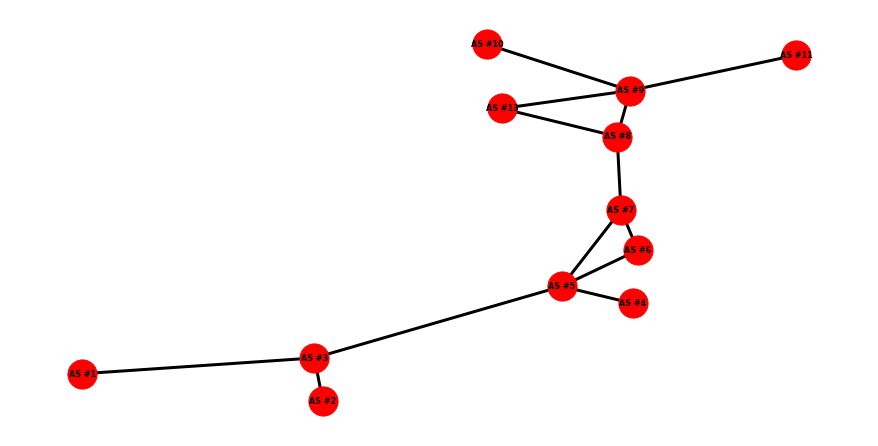

In [168]:
# define a graph
G = nx.Graph()

# generate the nodes strings
base_string = 'AS #'
ns = [f'{base_string}{i}' for i in range(1, 14)]  # node strings AS #1, AS #2, ... AS# 10, AS #11, AS #12, AS #13

# add nodes to the graph
edges_excluding_AS12 = ns[:11]+[ns[12]]
G.add_nodes_from(edges_excluding_AS12) # create a graph that doesn't include edge 12

# add edges to the graph
G.add_edges_from([(ns[5-1], ns[3-1]), (ns[5-1], ns[7-1])], color='red', weight=2) # add all edges with weight=2, Connecting nodes (5,3) and (5,7)
G.add_edges_from([(ns[7-1], ns[8-1]), (ns[9-1], ns[10-1])], color='red', weight=3) # weight=3, edges: (7,8) and (9,10)
G.add_edges_from([(ns[1-1], ns[3-1]), (ns[2-1], ns[3-1]), (ns[6-1], ns[7-1]), (ns[8-1], ns[13-1]), (ns[9-1], ns[11-1])], color='red', weight=4) # weight=4
G.add_edges_from([(ns[5-1], ns[6-1]), (ns[9-1], ns[13-1])], color='red', weight=5) # weight=5
G.add_edge(ns[8-1], ns[9-1], color='red', weight=7) # weight=7
G.add_edge(ns[4-1], ns[5-1], color='red', weight=20) # weight=20

fig = plt.figure(figsize=(12,6))
nx.draw(G, with_labels=True, font_weight='bold', **options)
plt.show()

Έπειτα προσθέτουμε τον κόμβο **AS #12** στο γράφο και προσθέτουμε τις ακμές **AS #12** σε **AS #3**, **AS #12** σε **AS #10** και **AS #12** σε **AS #11**.

In [169]:
G.add_node('AS #12')

G.add_edge(ns[12-1], ns[3-1], color='red', weight=2)
G.add_edge(ns[12-1], ns[10-1], color='red', weight=2)
G.add_edge(ns[12-1], ns[11-1], color='red', weight=4)

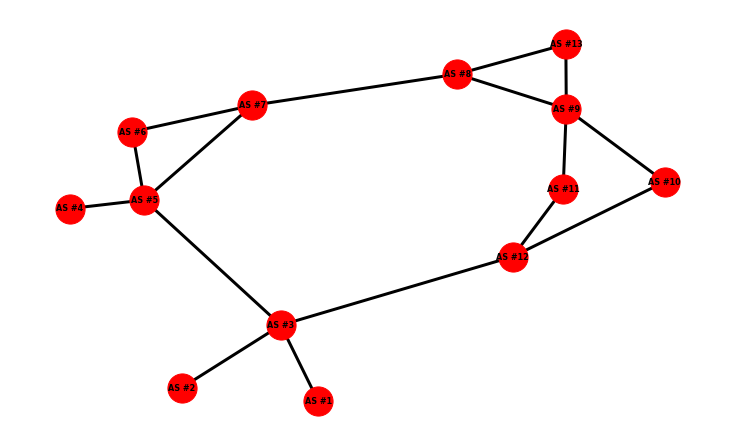

In [172]:
fig = plt.figure(figsize=(10,6))
nx.draw(G, with_labels=True, font_weight='bold', **options)
plt.show()

In [173]:
bf_shortest_path = bf.bellman_ford(G, source='AS #2',target="AS #11")
bf_shortest_path

(10, ['AS #2', 'AS #3', 'AS #12', 'AS #11'], False)

Όπως βλέπουμε, το κόστος μειώνεται σημαντικά σε 10 μονάδες και το συντομότατο μονοπάτι είναι το **AS #2** -> **AS #3** -> **AS #12** -> **AS #11**.

To GR-IX είναι ένα ουδέτερο, μη κερδοσκοπικό και ανεξάρτητο internet exchange το οποίο διευκολύνει την ανταλλαγή κίνησης διαδικτύου (IP) στην Ελλάδα. Διασυνδέει τις μεγαλύτερες εταιρείες διαδικτύου στη χώρα, όπως πάροχους υπηρεσιών Internet, πάροχους περιεχομένου, πάροχους υπηρεσιών cloud κλπ.

Με αντίστοιχο τρόπο όπως δείξαμε παραπάνω το GR-IX δημιουργεί συνδέσεις μικρού κόστους (σύνδεσης) στις εταιρείες αυτές ώστε να υπάρχει αποδοτικότερη, ανθεκτικότερη και σταθερότερη δρομολόγηση της κίνησης IP όπως και αυτονομία στην πολιτική δρομολόγησης. Παράλληλα, προσθέτει ανθεκτικότητα σε δικτυακά προβλήματα (πχ βλάβες διασύνδεσης) και προστασία σε επιθέσεις DDoS.